# Create a Curve Fitting Algo for VIX Future Curves

In [7]:
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

### Define the function to optimize

In [45]:
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

Text(0, 0.5, 'Volitility')

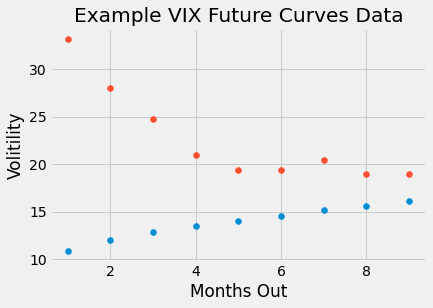

In [38]:
# Example data sets
y1 = [10.875, 11.975, 12.825, 13.525, 14.025, 14.525, 15.125,15.575, 16.1] #1/2/18
y2 = [33.225, 27.975, 24.725, 20.95, 19.375, 19.425, 20.425, 18.925, 18.975] #2/5/18
plt.scatter(np.arange(1, len(y1)+1),y1)
plt.scatter(np.arange(1, len(y2)+1),y2)
plt.title("Example VIX Future Curves Data")
plt.xlabel("Months Out")
plt.ylabel("Volitility")

### Fit function and calculate covarience, standard deviation, and residuals

In [39]:
from scipy.optimize import curve_fit

In [51]:
pars_1, cov_1 = curve_fit(f=exp_func, xdata = np.arange(1, len(y1)+1), ydata=y1, p0=[0, -0.5, 20], maxfev=5000)
pars_2, cov_2 = curve_fit(f=exp_func, xdata = np.arange(1, len(y2)+1), ydata=y2, p0=[0, -0.5, 20], maxfev=5000)

stdevs_1 = np.sqrt(np.diag(cov_1))
stdevs_2 = np.sqrt(np.diag(cov_2))

res_1 = y1 - exp_func(np.arange(1, len(y1)+1), *pars_1)
res_2 = y2 - exp_func(np.arange(1, len(y2)+1), *pars_2)

correlation_matrix = np.corrcoef(exp_func(np.arange(1, len(y1)+1), *pars_1), y1)
correlation_xy = correlation_matrix[0,1]
r_squared_1 = correlation_xy**2
correlation_matrix = np.corrcoef(exp_func(np.arange(1, len(y2)+1), *pars_2), y2)
correlation_xy = correlation_matrix[0,1]
r_squared_2 = correlation_xy**2

print(f"Y1 = {pars_1[0]} * e^({pars_1[1]} * x) + {pars_1[2]}")
print(f"Y2 = {pars_2[0]} * e^({pars_2[1]} * x) + {pars_2[2]}")
print(f"R^2 of y1 is {r_squared_1}")
print(f"R^2 of y2 is {r_squared_2}")

Y1 = -9.070295068831516 * e^(-0.12299649960255589 * x) + 18.99373903542309
Y2 = 25.040988713513524 * e^(-0.5179077452685189 * x) + 18.604802428531485
R^2 of y1 is 0.9972048503199805
R^2 of y2 is 0.9784348760498647


Text(0, 0.5, 'Volitility')

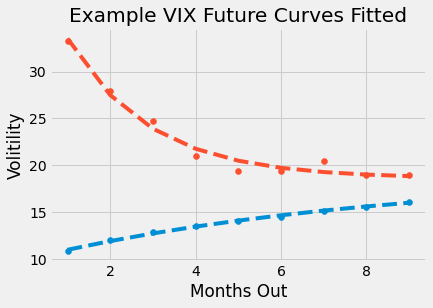

In [52]:
plt.scatter(np.arange(1, len(y1)+1),y1)
plt.scatter(np.arange(1, len(y2)+1),y2)
plt.plot(np.arange(1, len(y1)+1), exp_func(np.arange(1, len(y1)+1), *pars_1), linestyle='--')
plt.plot(np.arange(1, len(y2)+1), exp_func(np.arange(1, len(y2)+1), *pars_2), linestyle='--')
plt.title("Example VIX Future Curves Fitted")
plt.xlabel("Months Out")
plt.ylabel("Volitility")